In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import io
from seaborn import despine
import os
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["k", "b", "g", "r"]) 

In [70]:
datafolder = '/Users/rdgao/Documents/data/Muotri/Jason/MEA/thalamus/4.21.20/'
datafiles = [datafolder+f for f in os.listdir(datafolder) if os.path.isdir(datafolder+f)]
datafiles = np.array(datafiles)[[0,3,2,1]]
datasets = [io.loadmat(f+'/summary.mat', squeeze_me=True) for f in datafiles]
wells = datasets[0]['wells']-1

In [84]:
datasets[0]['PSDw'][0].shape[1]

64

In [96]:
def plot_comp_ts(datasets, wells, feat_x, feat_y, XL, YL, plot_dim):
    for i_w, well in enumerate(wells):
        plt.subplot(plot_dim[0],plot_dim[1],i_w+1)
        for ds in datasets:
            plt.plot(ds[feat_x], ds[feat_y][well,:], alpha=0.8)

        plt.xlim(XL); plt.ylim(YL)
        plt.xticks(plt.xlim()); plt.yticks(plt.ylim())

    plt.tight_layout(); despine()

    
def plot_comp_intrawell(datasets, well, feat_x, feat_y, XL, YL, plot_dim, loglog=[0,0]):
    chans = datasets[0][feat_y][well].shape[1]
    for i_c, chan in enumerate(range(chans)):
        plt.subplot(plot_dim[0],plot_dim[1], i_c+1)
        for ds in datasets:
            plt.plot(ds[feat_x], ds[feat_y][well][:,chan], alpha=0.8)

        if loglog[0]: plt.xscale('log')
        if loglog[1]: plt.yscale('log')

        plt.xlim(XL); plt.ylim(YL)
        plt.xticks(plt.xlim()); plt.yticks([])

    plt.tight_layout(); despine()
    

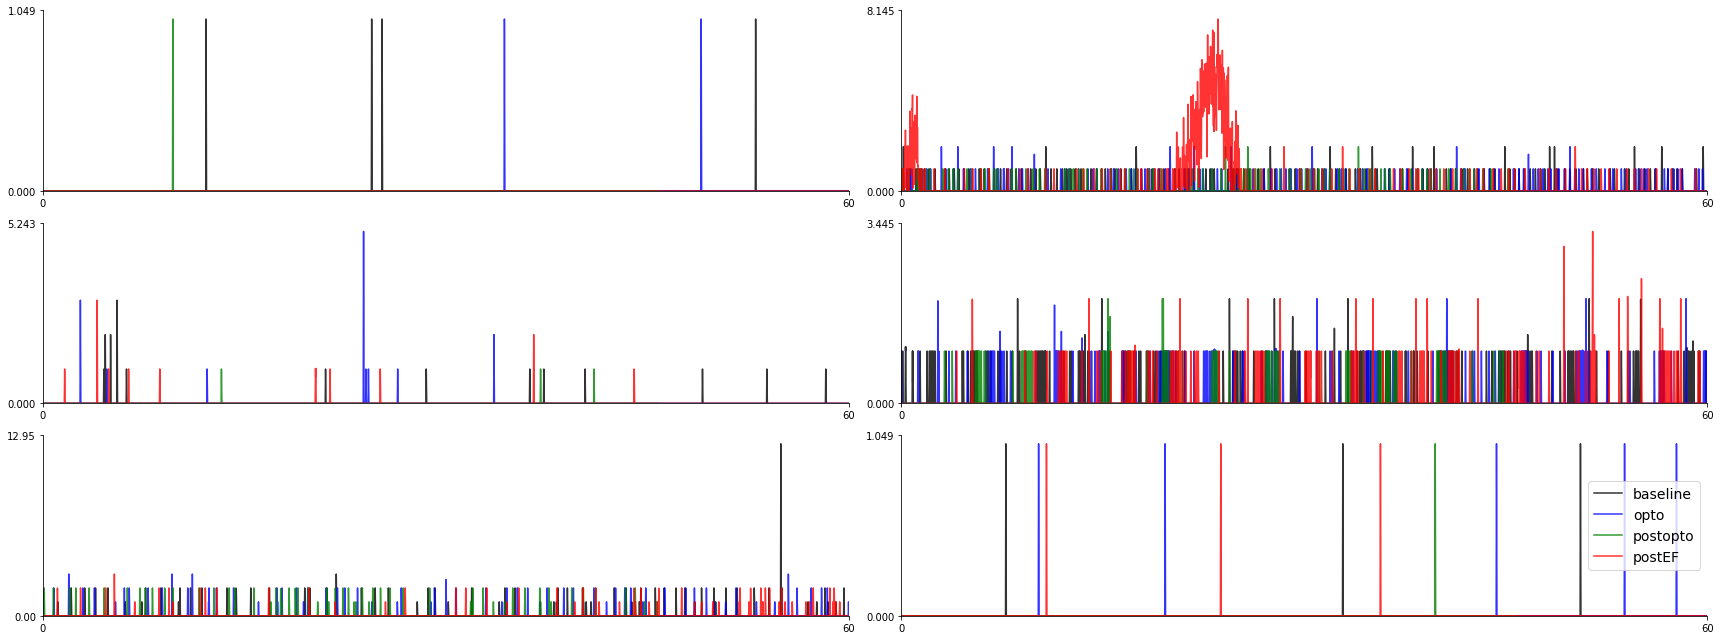

In [104]:
plt.figure(figsize=(24,9))
plot_comp_ts(datasets, wells, 't_ds', 'nws_smo', [0,60], [0,None], [3,2])
plt.legend(['baseline','opto','postopto','postEF'], fontsize=14, loc='right')
plt.savefig(datafolder+'networkspikes.pdf')

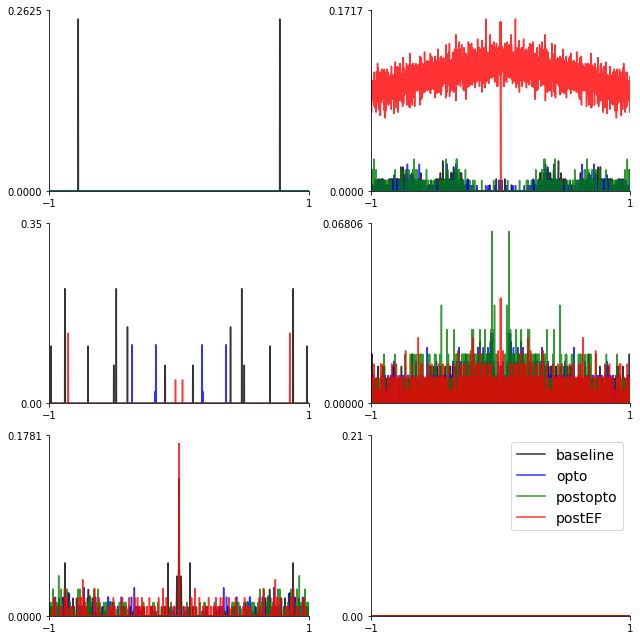

In [106]:
plt.figure(figsize=(9,9))
plot_comp_ts(datasets, wells, 't_ac', 'ac', [-1,1], [0,None], [3,2])
plt.legend(['baseline','opto','postopto','postEF'], fontsize=14)
plt.savefig(datafolder+'network_acf.pdf')

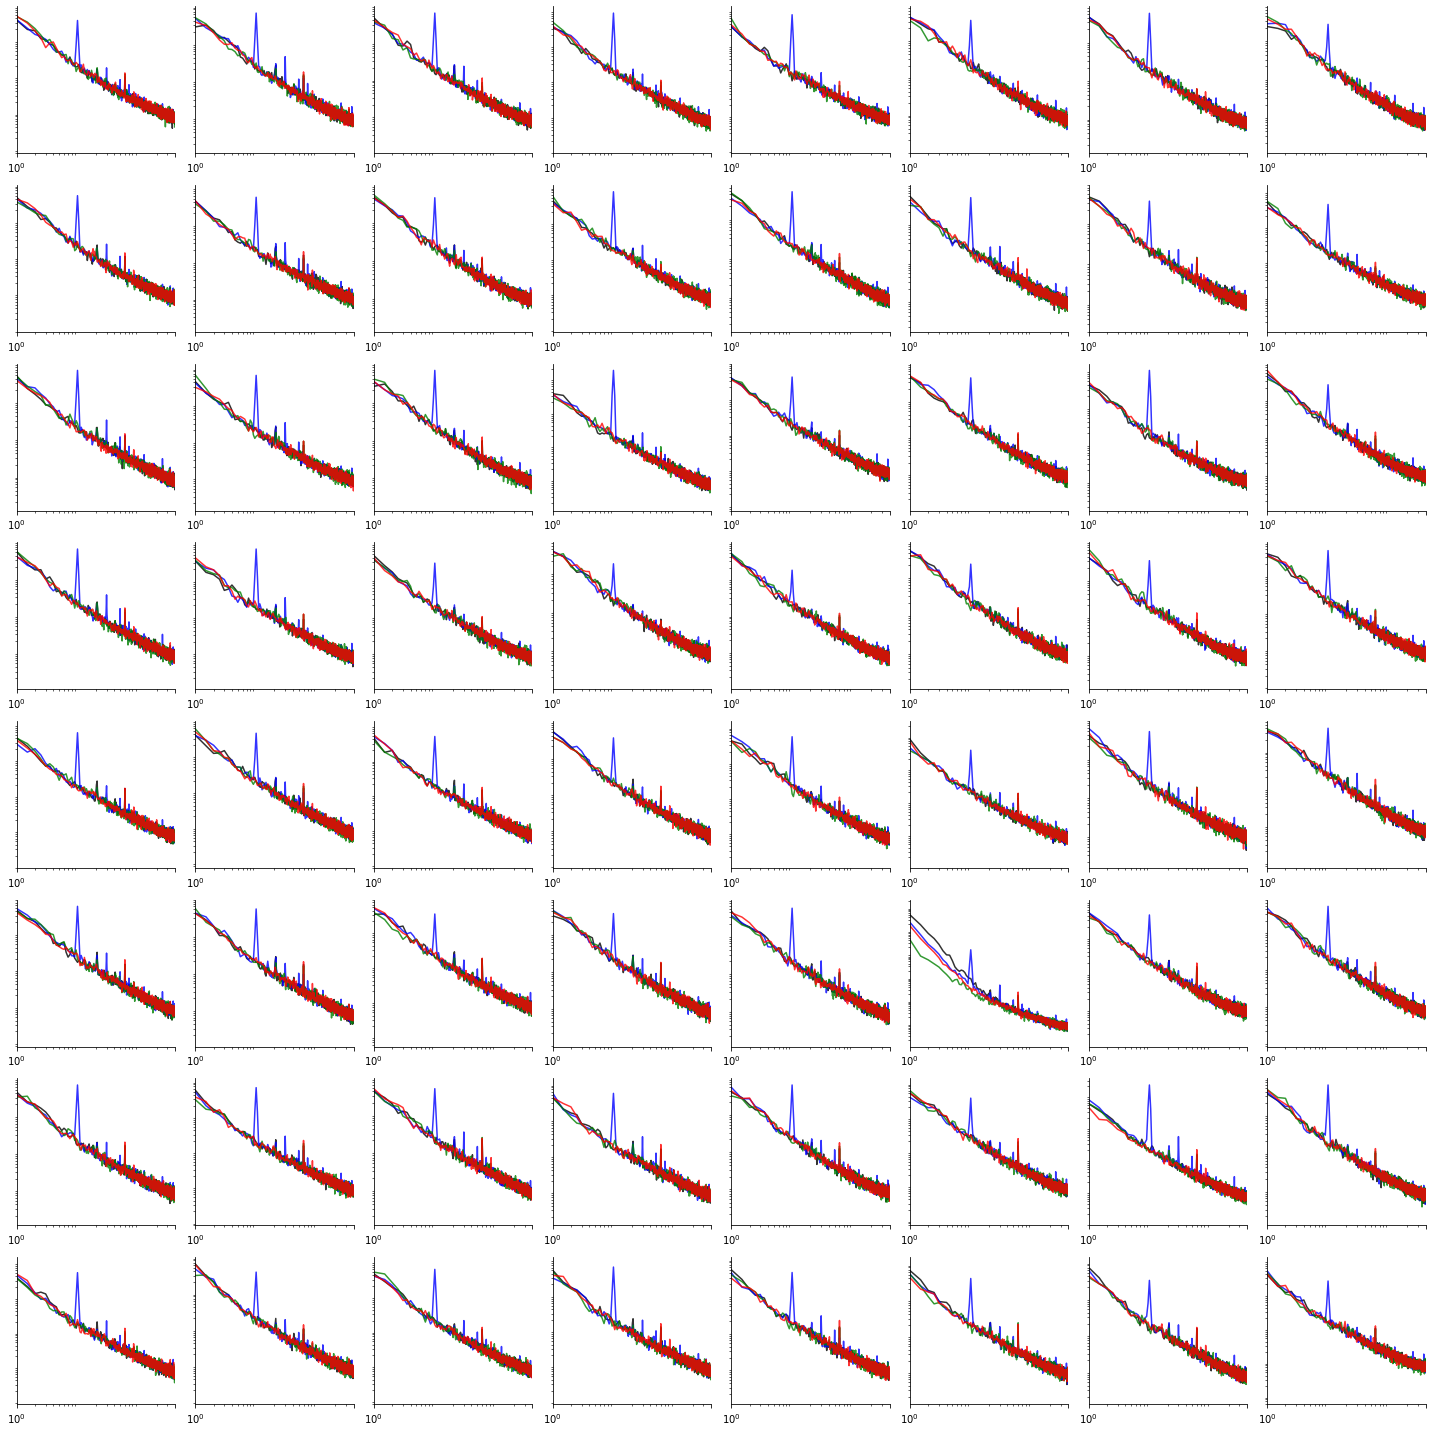

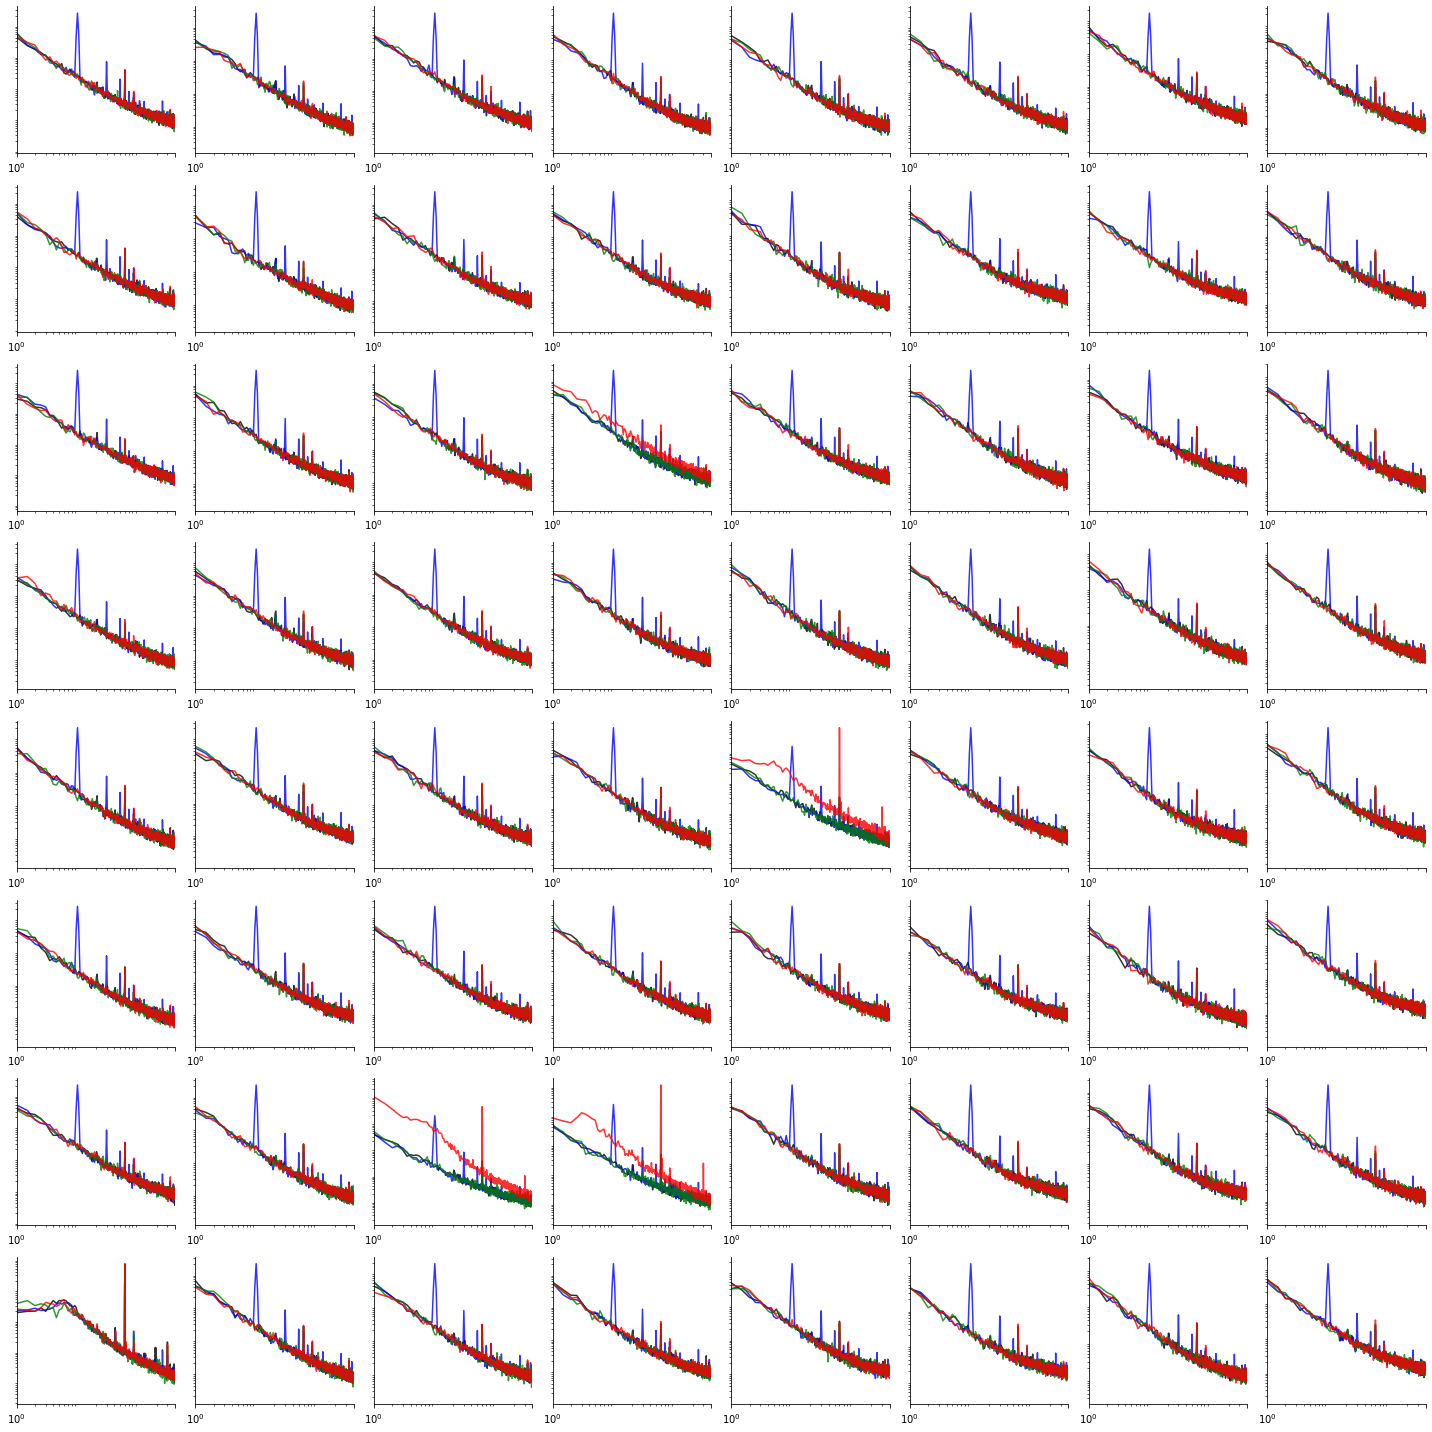

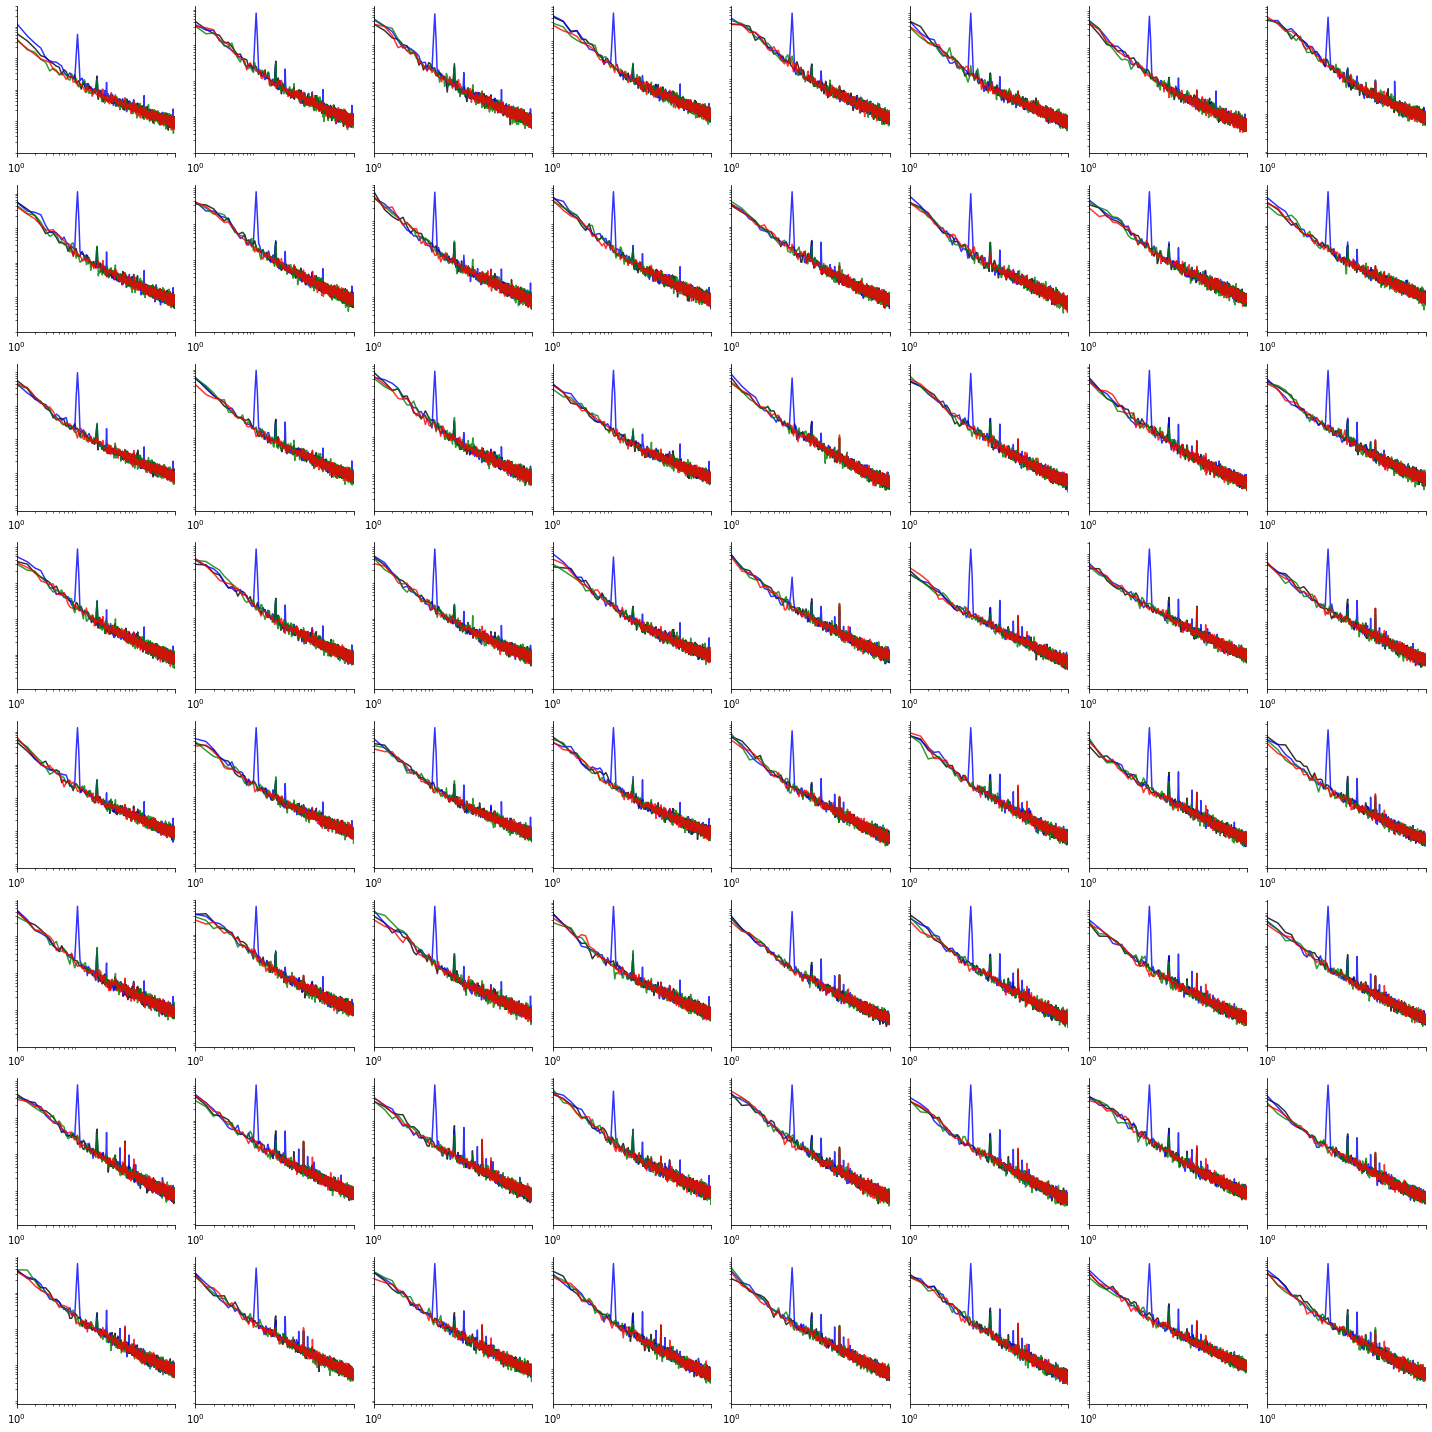

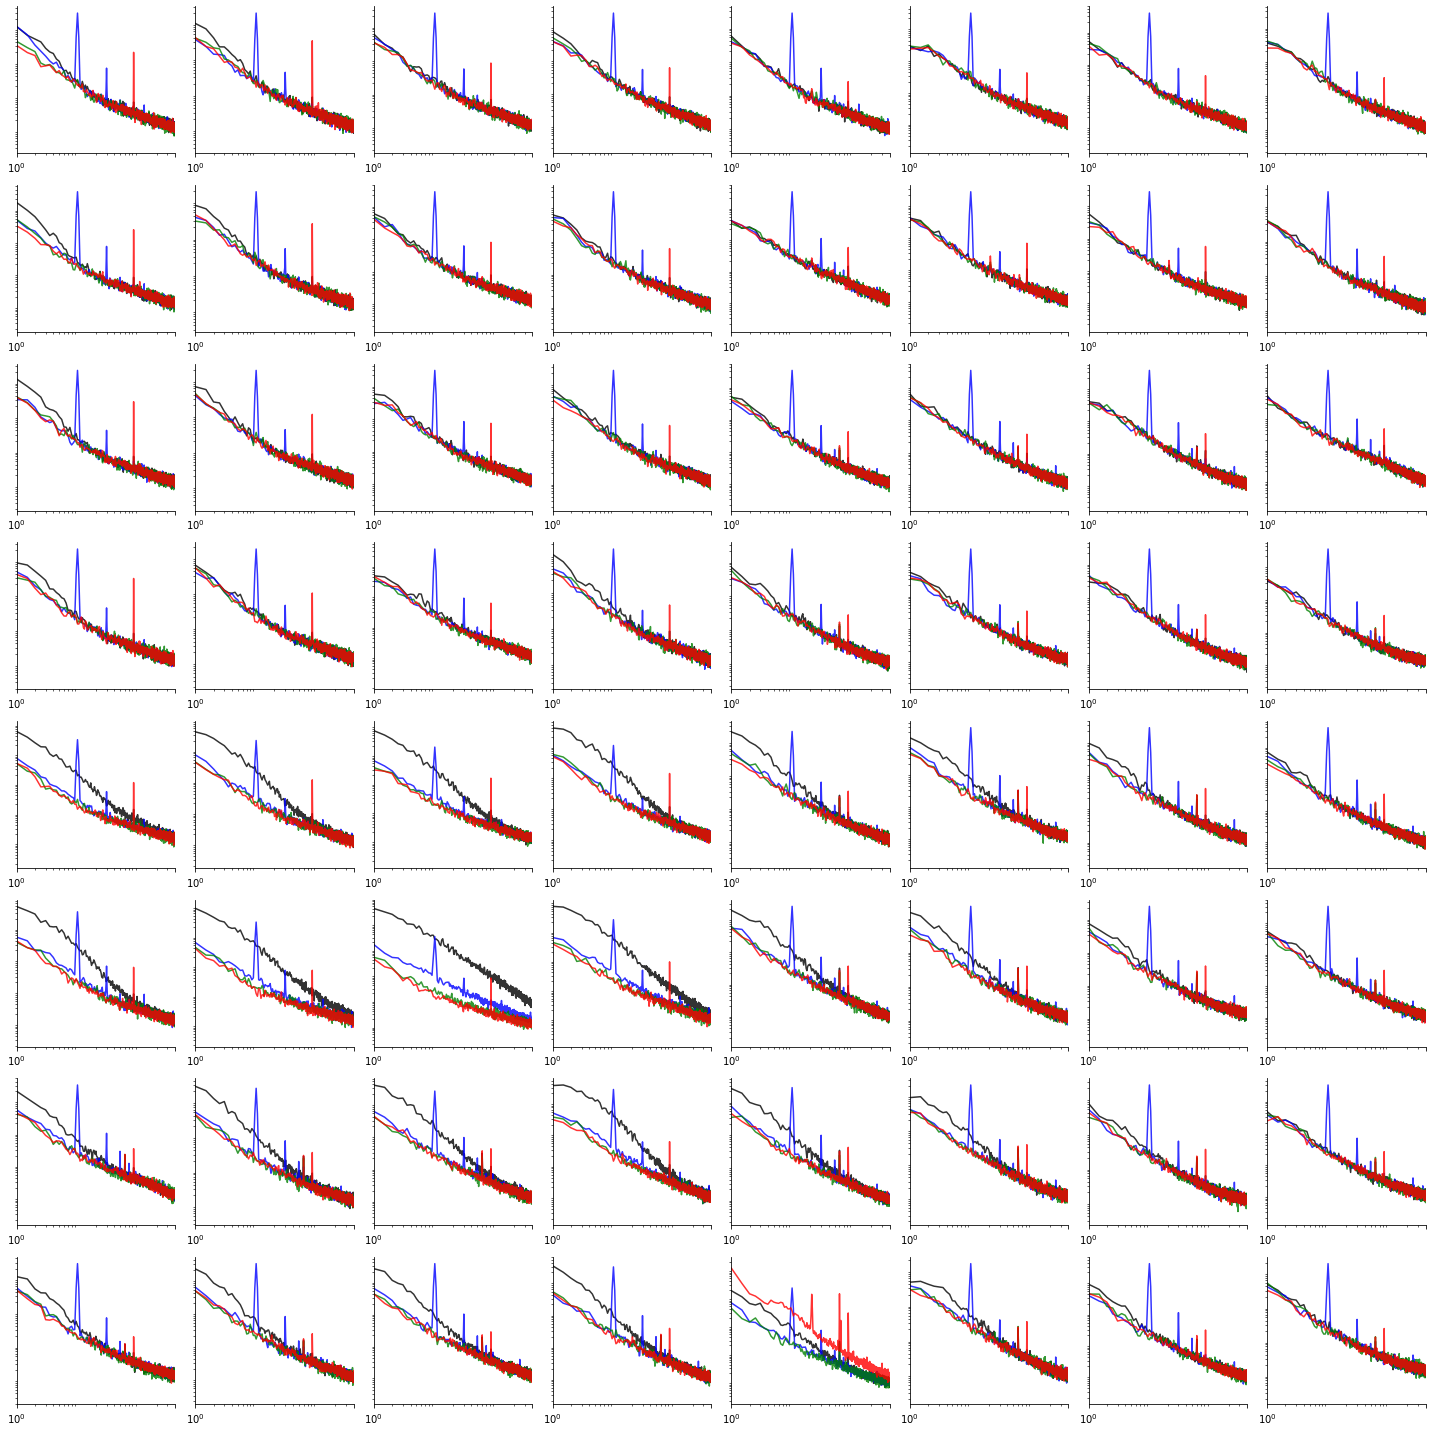

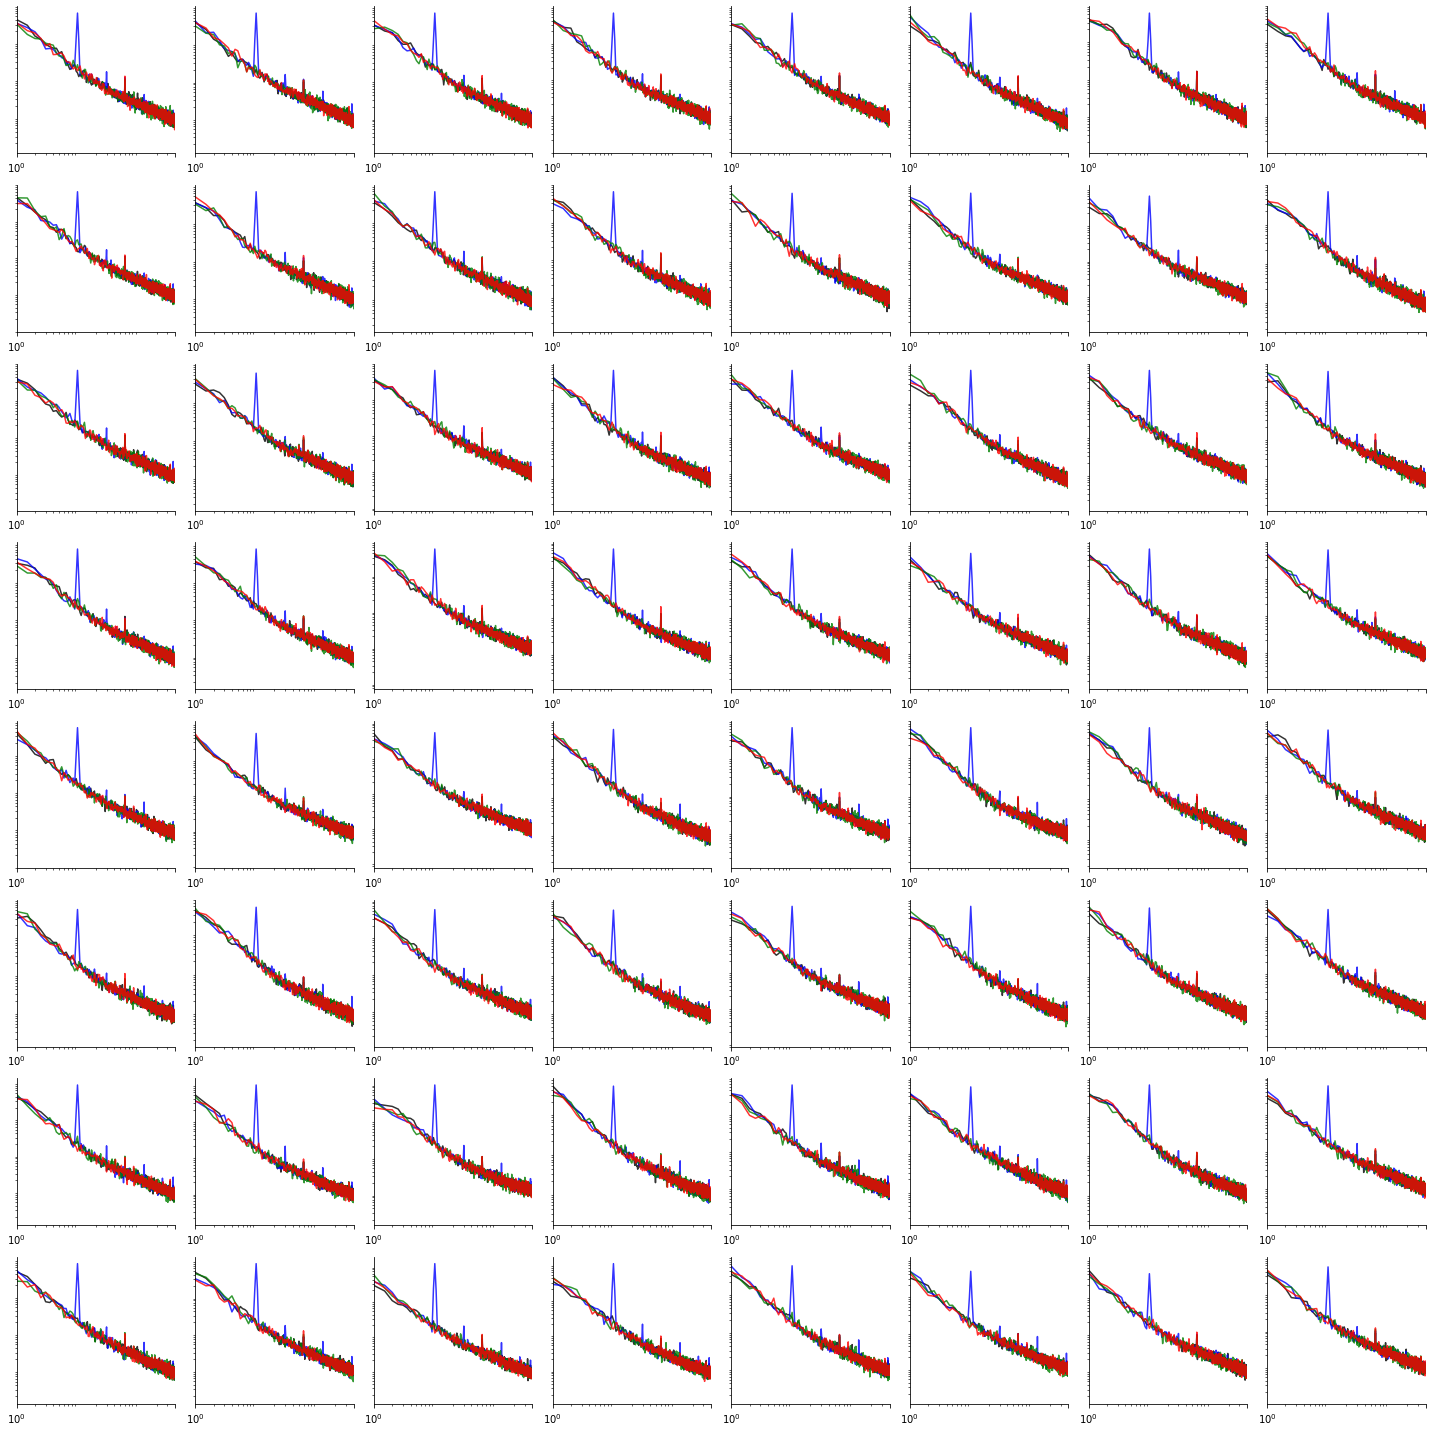

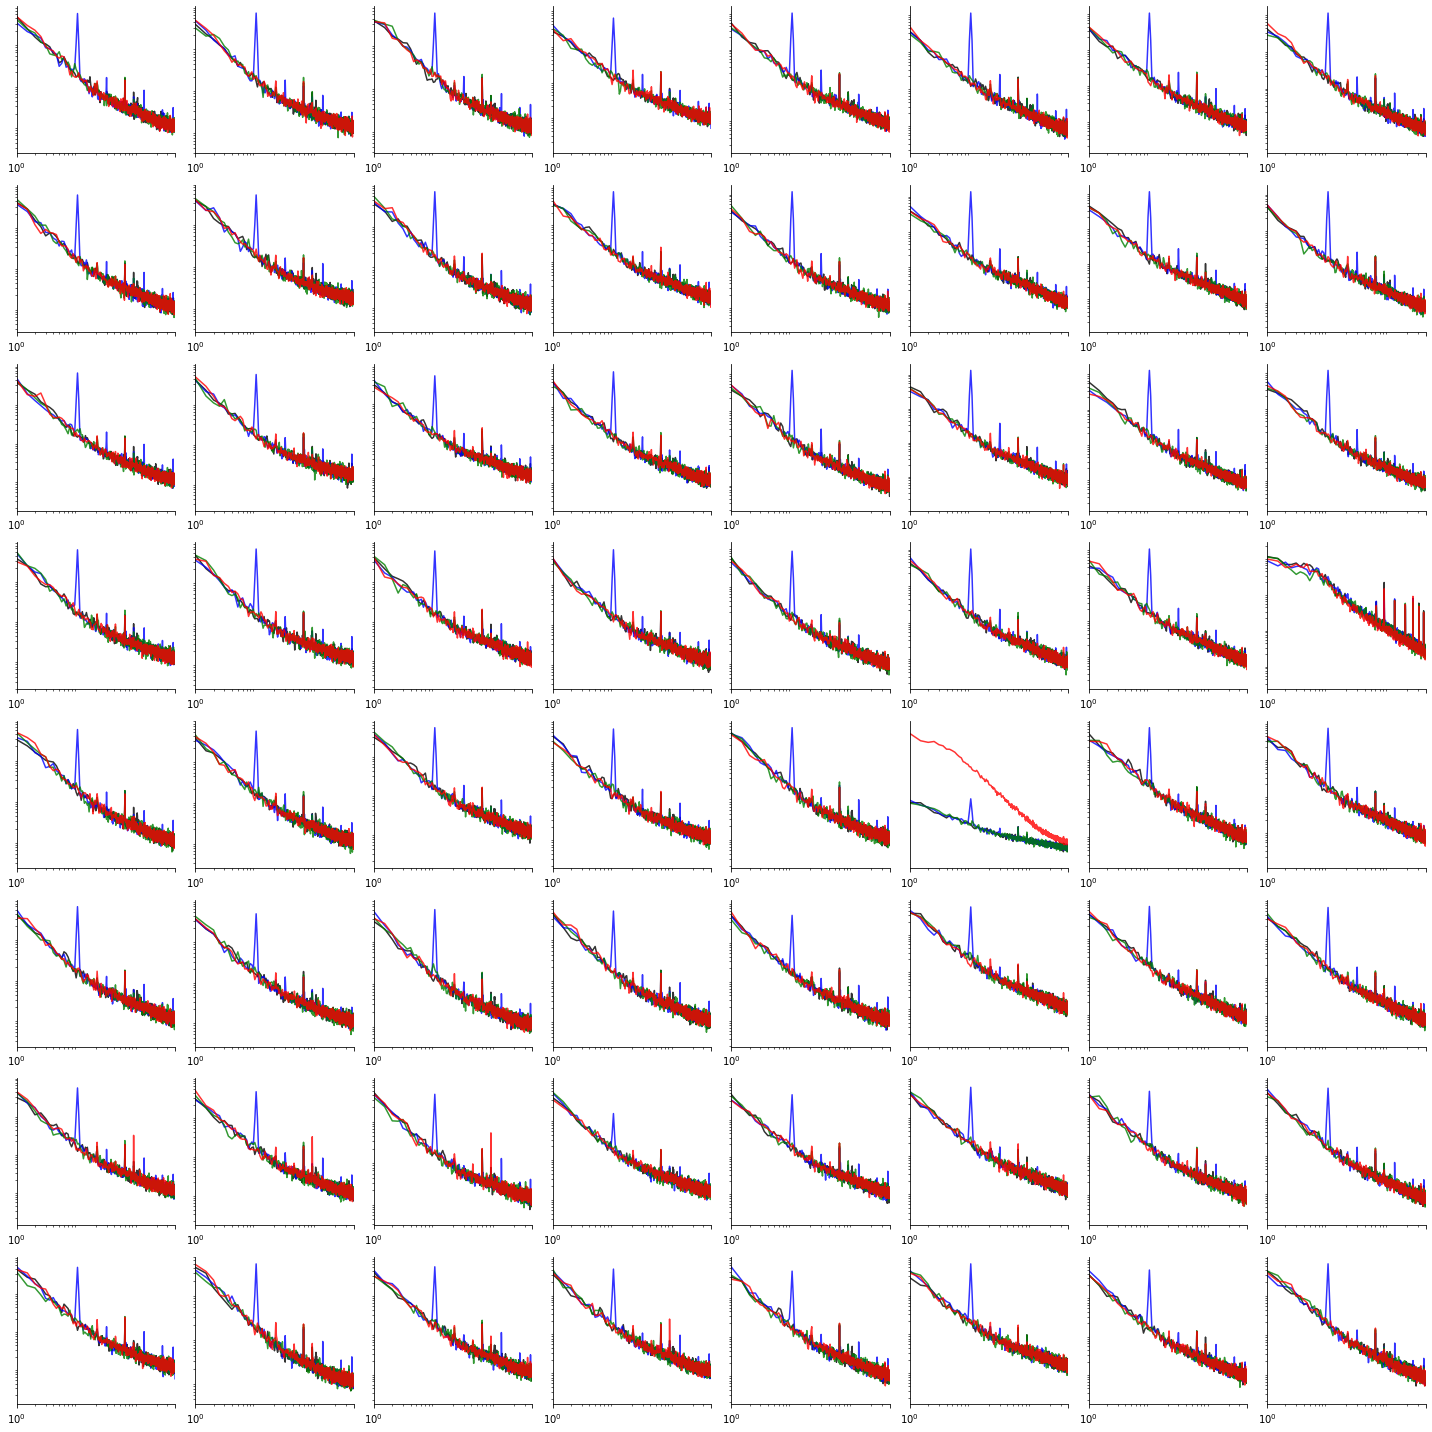

In [107]:
# plot all PSDs
for well in wells:
    plt.figure(figsize=(20,20))
    plot_comp_intrawell(datasets, well, 'f_axis', 'PSDm', [1,400], [None, None], [8,8], [1,1])
    plt.savefig(datafolder+'PSDm_well%i.pdf'%(well+1))